# Part1 

In [73]:
%pylab inline
from PIL import Image
import os
import pandas as pd
import pylab as pl
from sklearn import (decomposition, manifold)

Populating the interactive namespace from numpy and matplotlib


In [74]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [75]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [76]:
X = pd.DataFrame([im.histogram() for im in images])

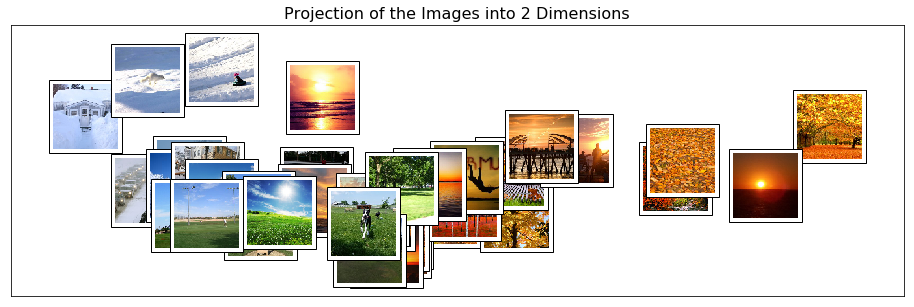

In [77]:
pca = decomposition.PCA(n_components=2)
X_std_pca = pca.fit_transform(X)
plot_image_space(images,X_std_pca,"Projection of the Images into 2 Dimensions") 


# Part2

Given this output, What does it mean for two images to be close together in this plot?
What does it mean for two images to be far apart?

In this approach, the data is arranged to derive the histogram of 65,000 pixels distributed over 768 (256*3) color values, with the value of histogram being the number of pixels in the image corresponding to the color value. The histogram value represents different features of images. After performing PCA on image histograms, we could view the distribution of images on a two dimentional space. As a result, the images with similar histograms should be closer in the two dimentional space.

If two pictures are closer to each other, it indicates that their histogram values are more similar to each other and have more features in common, which means their color is more alike. Similarly, if two images are seperated apart, their histogram values have more difference, they have less features in common and their colors are less alike. Because each season has its own type of color, this method could be used to group images from the same season together.

# Part3

Repeat this process using a different data reduction method and describe any similarities/differences between that experiment when compared to applying PCA.

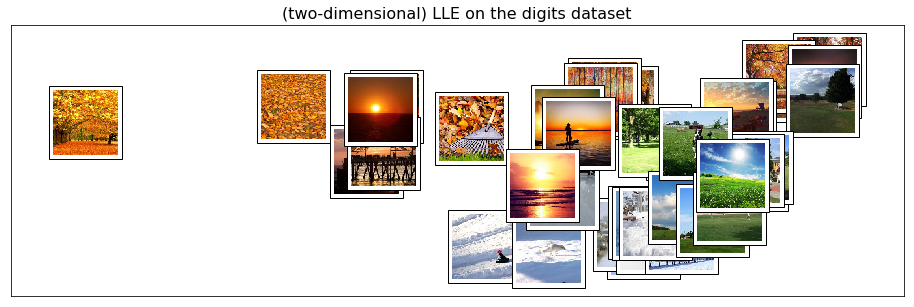

In [78]:
clf = manifold.LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='standard')
X_lle = clf.fit_transform(X)
plot_image_space(images,X_lle,"(two-dimensional) LLE on the digits dataset")

I select another method locally linear embedding (LLE) to embed the dataset into 2 dimensions.
This method finds the neighbor points for each point and computes a set of weights that describe the point as linear combination of its neighbors, and embed the points in low dimension following the same linear combination with minimal discrepancy. Compared to PCA, LLE peforms linear dimension reduction at each point because the manifold appears linear locally.

According to the comparison, the LLE could seperate images from autumn, but performs less satisfactory when  differentiating other seasons. Images from summer, winter and spring are orientated less seperate than that performed by PCA. Besides, selecting different number of neighbor points could largely influence the result, since too little neighbor points poorly represent the topological structure and too many points cause them to overlap. 